# Self Representer-Values on MNIST dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from mislabeled.probe import Representer

In [2]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y = LabelEncoder().fit_transform(y)

In [3]:
mlp = make_pipeline(
    MinMaxScaler(),
    MLPClassifier(hidden_layer_sizes=(512,), alpha=1e-2, max_iter=200, batch_size=1024),
)
mlp.fit(X, y)
y_pred = mlp.predict(X)
print(f"train accuracy : {mlp.score(X, y)}")

train accuracy : 1.0


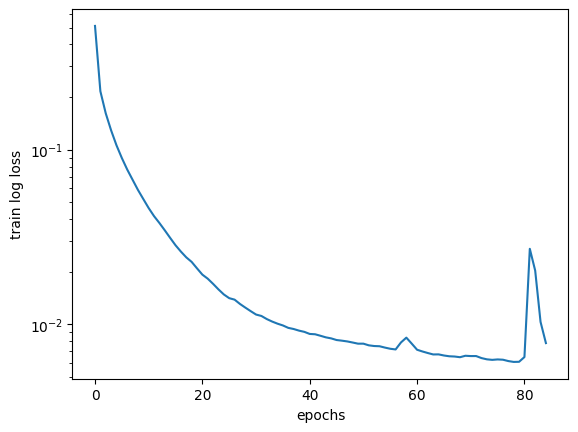

In [4]:
plt.plot(mlp[-1].loss_curve_)
plt.ylabel("train log loss")
plt.yscale("log")
plt.xlabel("epochs")
plt.show()

In [7]:
self_representer_values = Representer()(mlp, X, y)


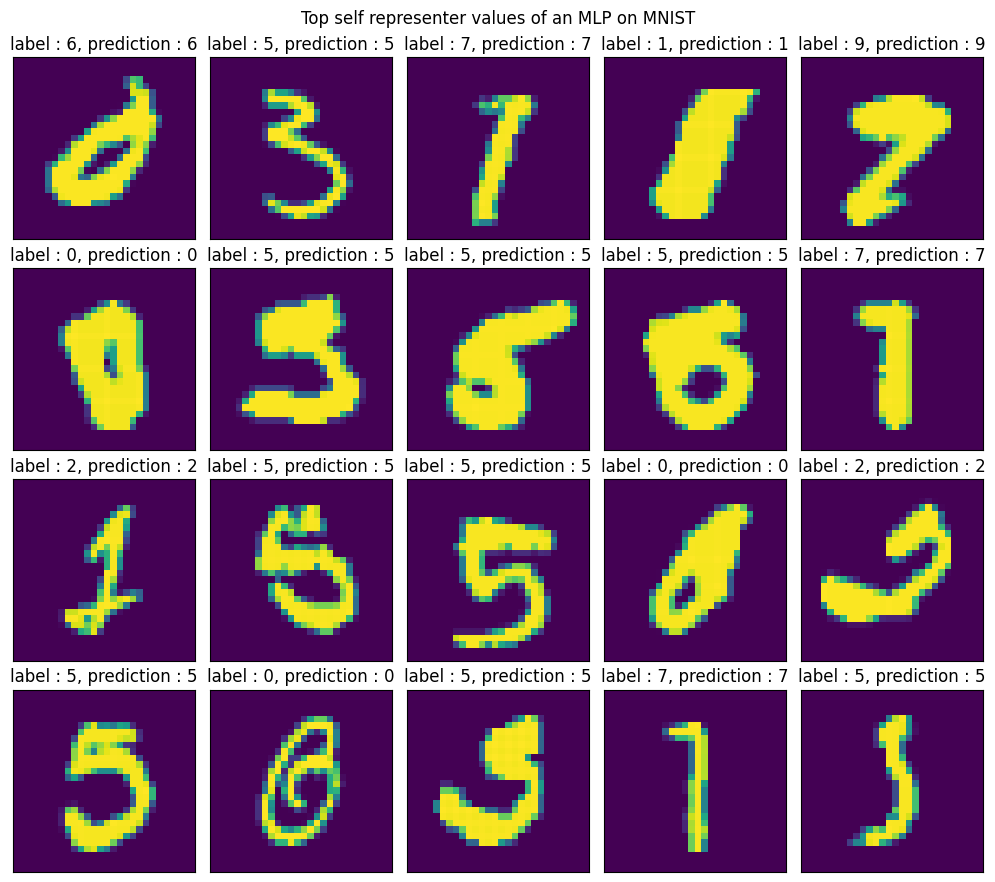

In [8]:
top_k = 20
img_per_row = 5
top_self_representer = np.argsort(-self_representer_values)[0:top_k]

fig, ax = plt.subplots(
    top_k // img_per_row,
    img_per_row,
    figsize=(10, 9),
)

fig.suptitle("Top self representer values of an MLP on MNIST")

for i, top_i in enumerate(top_self_representer):
    xx, yy = i // img_per_row, i % img_per_row
    ax[xx, yy].imshow(X[top_i].reshape(28, 28))
    ax[xx, yy].set_title(f"label : {y[top_i]}, prediction : {y_pred[top_i]}")
    ax[xx, yy].set_xticks(())
    ax[xx, yy].set_yticks(())
plt.tight_layout()
plt.show()